# Project Title - 2015 Nepal Earthquake - An analysis of the earthquake and it's effects


## Abstract - 

The 2015 Nepal earthquake, also known as the Gorkha earthquake, occurred on April 25, 2015, with a magnitude of 7.8. It struck near Kathmandu, the capital of Nepal, causing widespread devastation across the country and neighboring regions. The earthquake triggered landslides, avalanches, and aftershocks, including a significant one on May 12, 2015, with a magnitude of 7.3. Over 9,000 people were killed, tens of thousands were injured, and hundreds of thousands of homes were destroyed. Many UNESCO World Heritage sites, including historical temples, were severely damaged. The earthquake highlighted Nepal's vulnerability to seismic activity, prompting international relief efforts and raising awareness about the need for improved disaster preparedness and infrastructure resilience in the region.

In this small project I tried to understand the seismicity and the subsidence/upliftment through the GPS data. 

## Introduction - 

The April 2015 Nepal earthquake (also known as the Gorkha earthquake) killed 8,962 people and injured 21,952 across the Nepal, India, China and Bangladesh. It occurred at 11:56 Nepal Standard Time on Saturday 25 April 2015, with a magnitude of 7.8Mw or 8.1Ms and a maximum Mercalli Intensity of X (Extreme).

Its epicenter was east of Gorkha District at Barpak, Gorkha, roughly 85 km (53 mi) northwest of central Kathmandu, and its hypocenter was at a depth of approximately 8.2 km (5.1 mi). It was the worst natural disaster to strike Nepal since the 1934 Nepal–India earthquake.

### Cause
According to the USGS, the earthquake was caused by a sudden thrust, or release of built-up stress, along the major fault line where the Indian Plate, carrying India, is slowly diving underneath the Eurasian Plate, carrying much of Europe and Asia. Kathmandu, situated on a block of crust approximately 120 km (74 miles) wide and 60 km (37 miles) long, rapidly shifted 3 m (10 ft) to the south in a matter of just 30 seconds.

### USGS ShakeMap
<img src=https://upload.wikimedia.org/wikipedia/commons/d/d0/April_2015_Nepal_earthquake_ShakeMap_version_6.png>

## Motivation
The motivation comes from the fact Nepal lies towards the southern limit of the diffuse collisional boundary where the Indian Plate under thrusts the Eurasian Plate, occupying the central sector of the Himalayan arc, nearly one-third of the 2,400 km (1,500 mi) long Himalayas. Geologically, the Nepal Himalayas are subdivided into five tectonic zones from north to south, east to west, and almost parallel to sub-parallel.

Based on a study published in 2014, of the Main Frontal Thrust, on average a great earthquake occurs every 750 ± 140 and 870 ± 350 years in the east Nepal region. A study from 2015 found a 700-year delay between earthquakes in the region. The study also suggests that because of tectonic stress buildup, the 1934 earthquake and the 2015 quake are connected, following a historic earthquake pattern. A 2016 study on historical great (M ≥ 8) earthquake pairs and cycles found that associated great earthquakes are likely to occur in the West China region through the 2020s.

## Data Collection
Primarily for this study I have tried to analyze two different types of data
1. Seismic station data 
    -The purpose is straight forward; to analyze the seismicity.
2. GPS data 
    -The purpose is to see the ground motion and anomaly in the data which can be correlate with the seismic activity of the region with the particular time period. 

- Although we are looking for the 2-3 GPS station data for the analysis purpose.

#### Seismic Station Data Analysis
we will be importing the necessary libraries first and acquire the data then proceed with the other processes

In [44]:
#  pip install obspy

In [45]:
# Importing Libraries
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy
import datetime as dt
import matplotlib.dates as mdates
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
from matplotlib import image as im
client = Client("IRIS")

In [46]:
# obtaining the data from the IRIS Web Services
os.system("wget 'http://service.iris.edu/fdsnws/event/1/query?starttime=2009-01-01T00:00:00&endtime=2018-12-31T11:59:59&minmag=3&orderby=time&format=text&maxlat=30&minlon=78&maxlon=92&minlat=24&nodata=404' -O Nepal_earthquake.txt") 

--2024-09-27 22:11:21--  http://service.iris.edu/fdsnws/event/1/query?starttime=2009-01-01T00:00:00&endtime=2018-12-31T11:59:59&minmag=3&orderby=time&format=text&maxlat=30&minlon=78&maxlon=92&minlat=24&nodata=404
Resolving service.iris.edu (service.iris.edu)... 128.95.166.47
Connecting to service.iris.edu (service.iris.edu)|128.95.166.47|:80... connected.
HTTP request sent, awaiting response... 200 
Length: unspecified [text/plain]
Saving to: ‘Nepal_earthquake.txt’

     0K .......... .......... .......... .......... .......... 4.69K
    50K .......... .......... .......... .......... .......... 5.12K
   100K .......... .......... .......... .......               69.4K=21s

2024-09-27 22:11:45 (6.55 KB/s) - ‘Nepal_earthquake.txt’ saved [140472]



0

plot_mag_depth.xy: N = 1508	<0/100>	<3/7.9>


psxy [WARNING]: Your plot (WxH = 8.00 x 5.00 inch) placed at (1.00, 1.00 inch) may exceed your PS_MEDIA (WxH = 8.50 x 11.00 inch)


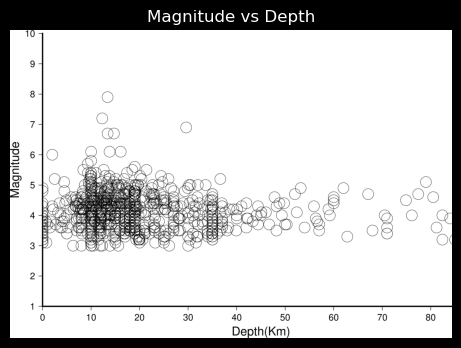

In [47]:
# To plot magnitude vs depth data we will filter out and append the specific column in a new file called plot_mag_depth.xy
os.system("awk -F '|' 'NR>1{print $5, $11}' Nepal_earthquake.txt > plot_mag_depth.xy")
os.system("gmt minmax plot_mag_depth.xy") #for the min max purpose
os.system('gmt psxy plot_mag_depth.xy -JX8/5 -R0/90/1/10 -B10:"Depth(Km)":/1:"Magnitude":SW -Sc0.2 > plot_mag_depth.ps')
os.system("gv plot_mag_depth.ps")
os.system("gmt psconvert -A -Tg plot_mag_depth.ps")
md = im.imread("plot_mag_depth.png")
plt.axis("off")
plt.title("Magnitude vs Depth")
plt.imshow(md)
plt.show()

plot_mag_year.xy: N = 1508	<2009/2018>	<3/7.9>


psxy [WARNING]: Your plot (WxH = 8.00 x 5.00 inch) placed at (1.00, 1.00 inch) may exceed your PS_MEDIA (WxH = 8.50 x 11.00 inch)


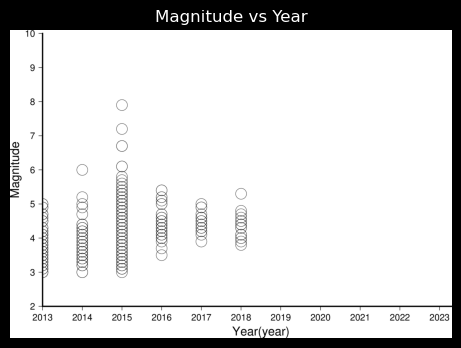

In [48]:
# To plot magnitude vs yearh data we will filter out and append the specific column in a new file called plot_mag_year.xy
# import subprocess

# command = """awk -F'|' 'NR>1 {split($2, date, "T"); split(date[1], yearmonthday, "-"); print yearmonthday[1], $11}' Nepal_earthquake.txt > plot_mag_year.xy"""
# subprocess.run(command, shell=True, check=True)


os.system("gmt minmax plot_mag_year.xy") #for the min max purpose
os.system(
    'gmt psxy plot_mag_year.xy -JX8/5 -R2013/2024/2/10 -B1:"Year(year)":/1:"Magnitude":SW -Sc0.2 > plot_mag_year.ps'
)
os.system("gv plot_mag_year.ps")
os.system("gmt psconvert -A -Tg plot_mag_year.ps")
my = im.imread("plot_mag_year.png")
plt.axis("off")
plt.title("Magnitude vs Year")
plt.imshow(my)
plt.show()

In [49]:
os.system("gmt makecpt -Cred,green,blue -T0,20,50,10000 > shake.cpt")
os.system("gmt pscoast -R70/98/16/32 -JM6i -B5 -P -Ggray -K > gmt_n.ps")
os.system(
    "gmt psxy -R -J -O makeept.xy -Wfaint -i1,0,2,3s0.1 -h3 -Scc -Cshake.cpt >> gmt_n.ps"
)
os.system("gv gmt_n.ps &")

psxy [ERROR]: Cannot find file makeept.xy


0

### Analysing the Seismic station
We will be using five diffrent station from all side (JP/JMM , GE/SOCY ,II/DGAR , TW/KMNB and IU/YAK )

In [50]:
location = "*"
channel = "BHZ"
client = Client("IRIS")
station = "JMM"
startt = UTCDateTime("2015-04-25T06:00:50")
endt = UTCDateTime("2015-04-25T07:00:50")
network = "JP"

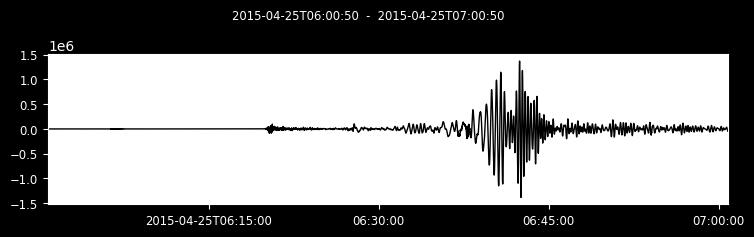

In [51]:
st = client.get_waveforms(network, station, location, channel, startt, endt)
# Trace = tr and Stream = st
tr = st[0]
fig = tr.plot()

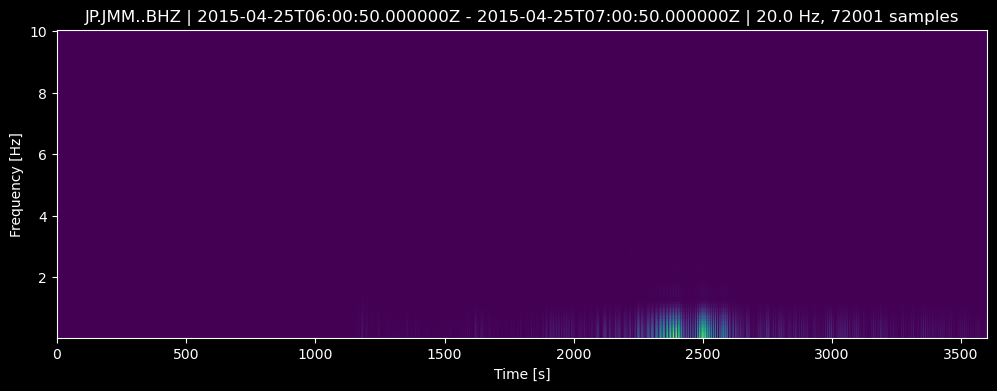

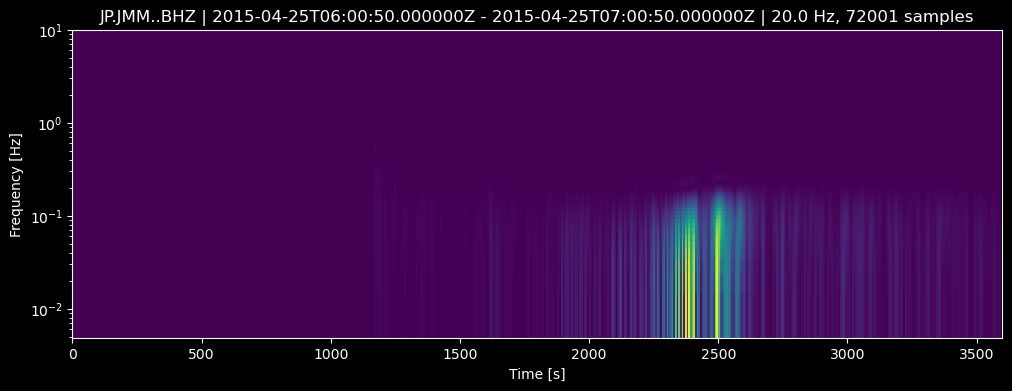

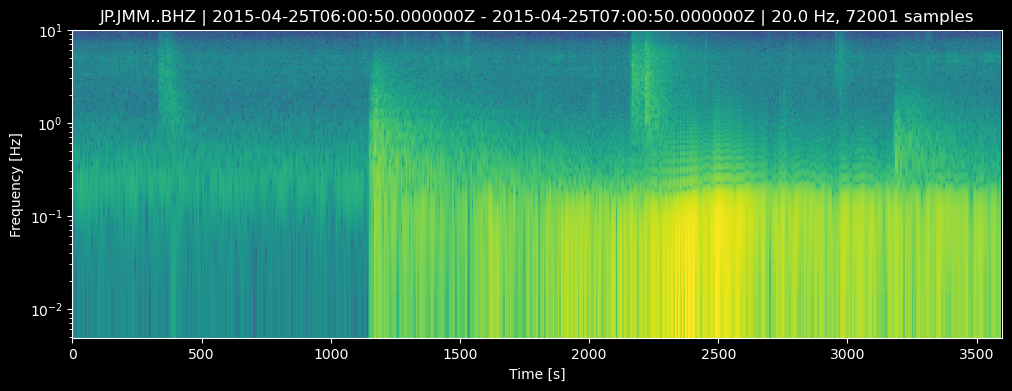

In [52]:
plt.rcParams["figure.figsize"] = (12, 4)
fig = tr.spectrogram(per_lap=0.5, wlen=2)

fig = tr.spectrogram(per_lap=0.5, wlen=10, log=True)

fig = tr.spectrogram(show=False, per_lap=0.5, wlen=10, log=True, dbscale=True)

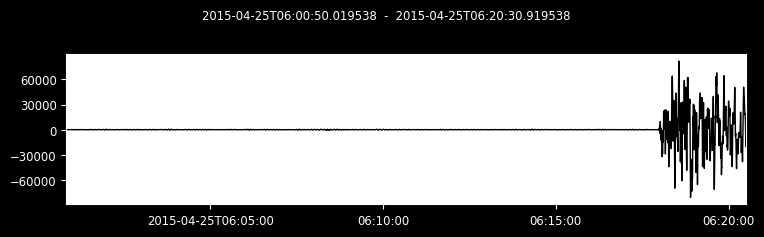

In [53]:
location = "*"
channel = "BHZ"
client = Client("IRIS")
station = "SOCY"
startt = UTCDateTime("2015-04-25T06:00:50")
endt = UTCDateTime("2015-04-25T07:00:50")
network = "GE"
st = client.get_waveforms(network, station, location, channel, startt, endt)
# Trace = tr and Stream = st
tr = st[0]
fig = tr.plot()

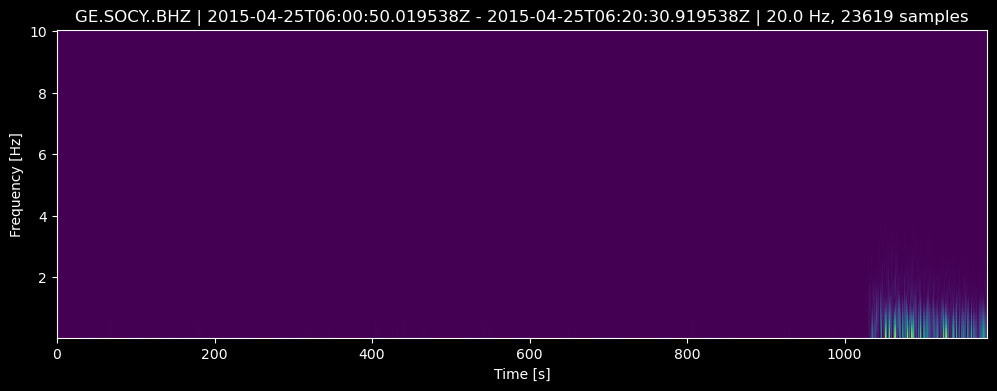

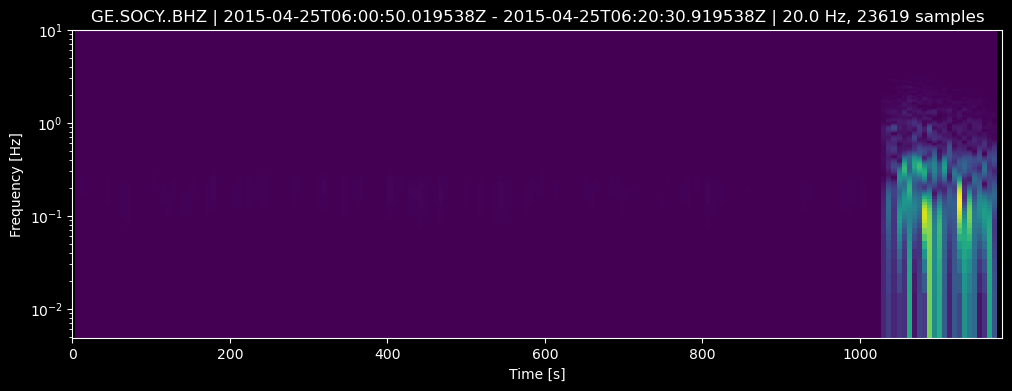

In [54]:
plt.rcParams['figure.figsize'] = (12 ,4)
fig = tr.spectrogram(per_lap=.5, wlen=2)

fig = tr.spectrogram(per_lap=0.5,wlen=10 , log=True)

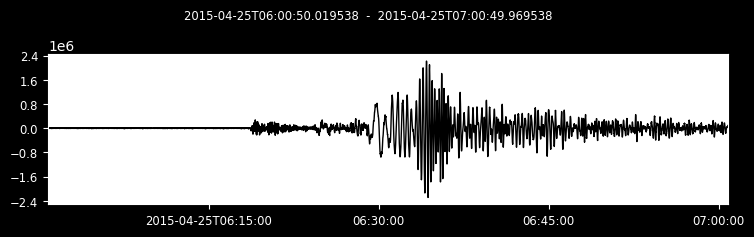

In [55]:
location = "*"
channel = "BHZ"
client = Client("IRIS")
station = "DGAR"
startt = UTCDateTime("2015-04-25T06:00:50")
endt = UTCDateTime("2015-04-25T07:00:50")
network = "II"

st = client.get_waveforms(network, station, location, channel, startt, endt)
# Trace = tr and Stream = st
tr = st[0]

fig = tr.plot()

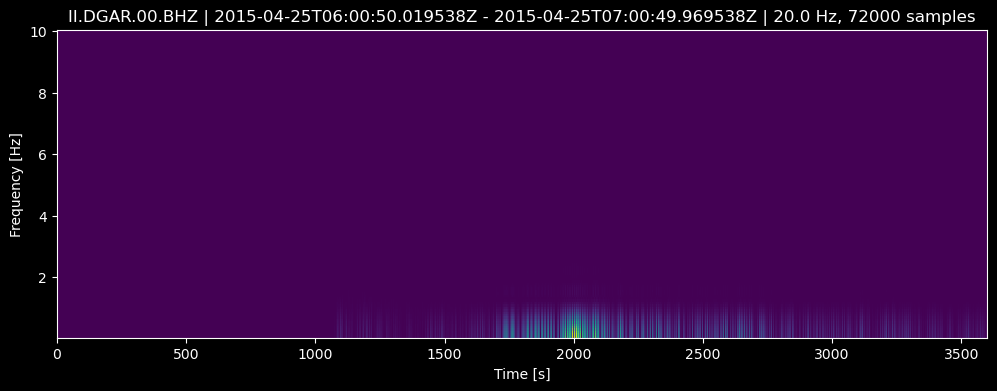

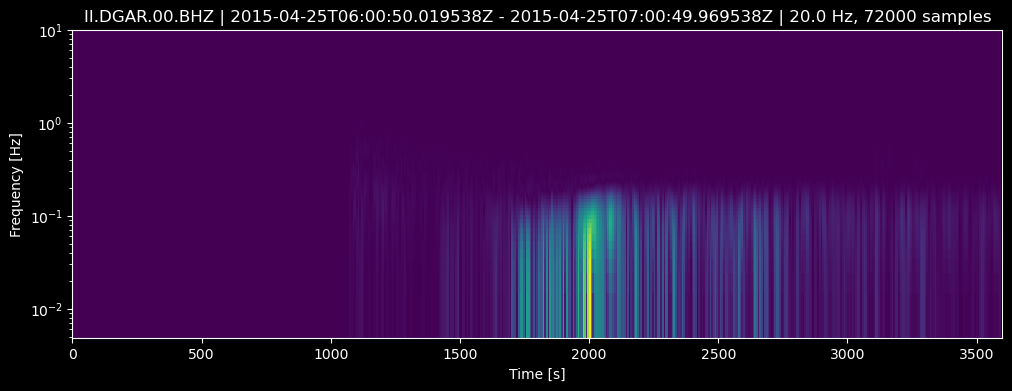

In [56]:
plt.rcParams["figure.figsize"] = (12, 4)
fig = tr.spectrogram(per_lap=0.5, wlen=2)

fig = tr.spectrogram(per_lap=0.5, wlen=10, log=True)

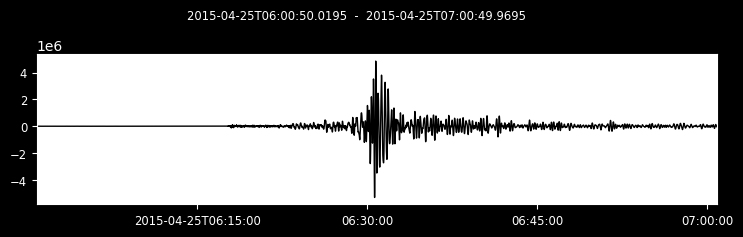

In [57]:
location = "*"
channel = "BHZ"
client = Client("IRIS")
station = "KMNB"
startt = UTCDateTime("2015-04-25T06:00:50")
endt = UTCDateTime("2015-04-25T07:00:50")
network = "TW"

st = client.get_waveforms(network, station, location, channel, startt, endt)
# Trace = tr and Stream = st
tr = st[0]

fig = tr.plot()

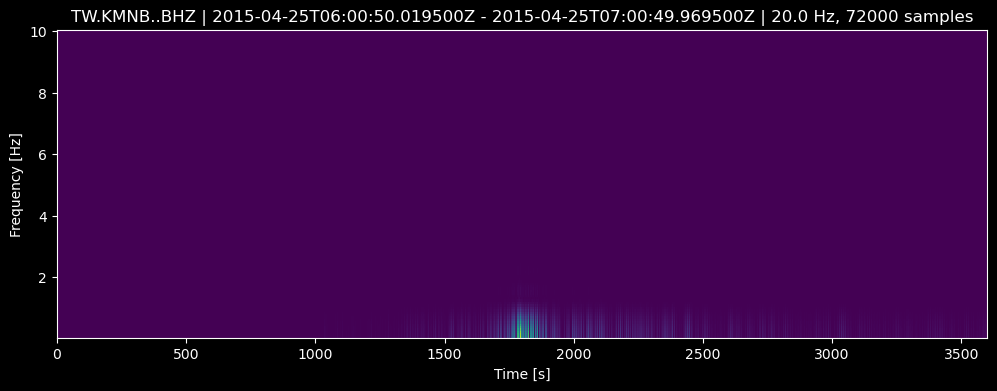

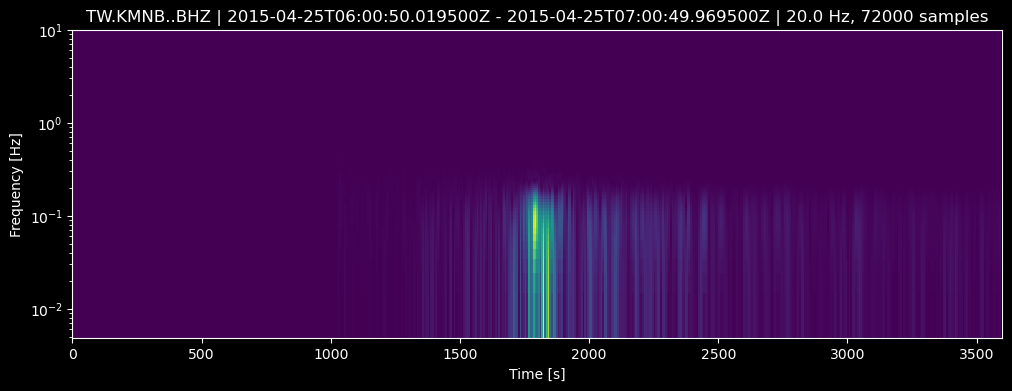

In [58]:
plt.rcParams["figure.figsize"] = (12, 4)
fig = tr.spectrogram(per_lap=0.5, wlen=2)

fig = tr.spectrogram(per_lap=0.5, wlen=10, log=True)

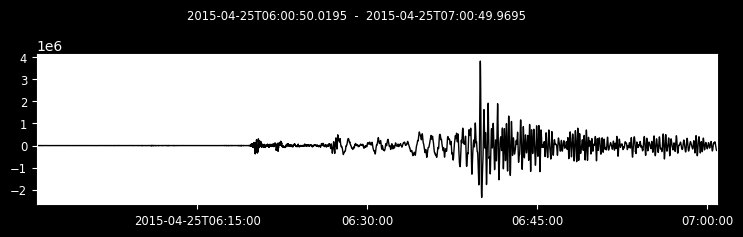

In [59]:
location = "*"
channel = "BHZ"
client = Client("IRIS")
station = "YAK"
startt = UTCDateTime("2015-04-25T06:00:50")
endt = UTCDateTime("2015-04-25T07:00:50")
network = "IU"

st = client.get_waveforms(network, station, location, channel, startt, endt)
# Trace = tr and Stream = st
tr = st[0]

fig = tr.plot()

### Analysing the GPS data
we will be using the NGL - SNDL and CHWN data for our analysis purpose

In [60]:
# getting the data
os.system('wget "http://geodesy.unr.edu/gps_timeseries/tenv3/plates/EU/SNDL.EU.tenv3"')
os.system('wget "http://geodesy.unr.edu/gps_timeseries/tenv3/plates/EU/CHWN.EU.tenv3"')

--2024-09-27 22:12:29--  http://geodesy.unr.edu/gps_timeseries/tenv3/plates/EU/SNDL.EU.tenv3
Resolving geodesy.unr.edu (geodesy.unr.edu)... 134.197.19.60
Connecting to geodesy.unr.edu (geodesy.unr.edu)|134.197.19.60|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 769692 (752K)
Saving to: ‘SNDL.EU.tenv3.1’

     0K .......... .......... .......... .......... ..........  6% 88.0K 8s
    50K .......... .......... .......... .......... .......... 13%  178K 6s
   100K .......... .......... .......... .......... .......... 19% 12.7M 3s
   150K .......... .......... .......... .......... .......... 26%  175K 3s
   200K .......... .......... .......... .......... .......... 33%  182K 3s
   250K .......... .......... .......... .......... .......... 39% 6.95M 2s
   300K .......... .......... .......... .......... .......... 46%  178K 2s
   350K .......... .......... .......... .......... .......... 53% 7.52M 1s
   400K .......... .......... .......... .......... .......

0

### Creating the Easting, Northing and Verticals change log and analysing them

In [61]:
os.system("awk 'NR>1{print $3,$9}' SNDL.EU.tenv3 > SNDL.te")
os.system("awk 'NR>1{print $3,$11}' SNDL.EU.tenv3 > SNDL.tn")
os.system("awk 'NR>1{print $3,$13}' SNDL.EU.tenv3 > SNDL.tv")

os.system("awk 'NR>1{print $3,$9}' CHWN.EU.tenv3 > CHWN.te")
os.system("awk 'NR>1{print $3,$11}' CHWN.EU.tenv3 > CHWN.tn")
os.system("awk 'NR>1{print $3,$13}' CHWN.EU.tenv3 > CHWN.tv")

0

In [62]:
# plotting the data
os.system("gmt minmax SNDL.te")
os.system("gmt minmax SNDL.tn")
os.system("gmt minmax SNDL.tv")

os.system("gmt minmax CHWN.te")
os.system("gmt minmax CHWN.tn")
os.system("gmt minmax CHWN.tv")

SNDL.te: N = 3772	<2011.258/2021.9274>	<-0.468684/-0.321477>
SNDL.tn: N = 3772	<2011.258/2021.9274>	<0.599311/0.834031>
SNDL.tv: N = 3772	<2011.258/2021.9274>	<0.664138/0.747751>
CHWN.te: N = 2081	<2011.2361/2019.2663>	<-1.260247/-1.202375>
CHWN.tn: N = 2081	<2011.2361/2019.2663>	<0.209851/0.494942>
CHWN.tv: N = 2081	<2011.2361/2019.2663>	<0.305691/0.387294>


0

In [63]:
os.system("chmod +x plot_SNDL.csh")
os.system("./plot_SNDL.csh")

[1] 57576


0

From the plotting we should see these kinds os plot
<img src= http://geodesy.unr.edu/tsplots/IGS14/plates/EU/TimeSeries/SNDL.png>
@NGL - Nevada Geodetic Laboratory


We can clearly see the anonaly in the image from that we can also say that the seismic activity is synonimous with the deformation of the stratigraphy.

## Discussion and Conclusion 
The P-wave arrival times at stations SOCY, DGAR, YAK, and KMNB are approximately the same, around 6:18 to 6:19. This suggests that these stations are at a similar distance from the seismic event. However, the JMM station shows a later arrival time, indicating it may be farther from the source. Another possibility is that the YAK station's path crosses continental crust, while the other stations lie over oceanic crust. Oceanic crust, being denser, allows seismic waves to travel faster, which could explain the observed differences in velocities. Further analysis is needed to clarify these observations.

Earthquakes are sudden movements of the Earth's crust, caused by the abrupt release of strain energy that has accumulated over time in a given region. The Himalayas are a seismically active area where earthquakes of varying magnitudes occur frequently. The region contains multiple potential zones for future seismic activity, posing a significant risk of damage to lives and property. It is essential to conduct further studies of the region to mitigate these risks and reduce potential harm.

Also the fact that the GPS station data is also indicating the upliftment of the regions tells us the intensity of the earthquake.

## Future Studies
- In the future studies we can definitely look into the amplitude of the seismic activity.
- Also, we can understand the upliftment and depression in a month basis.
- We can also use SAR data to see the geomorphic activity of the region. 
- Therefore deriving some relation with the amplitude and GPS data.

## Acknowledgement
I would like to extend my heartfelt thanks to Professor Mike Brudzinski, Michael Hubenthal, Gillian Haberli, Nicole Richels, and Ellie Meyer for their invaluable guidance and unwavering support during the Seismology Skill Building Workshop for Undergraduates (2024). Their expertise and mentorship have been instrumental in enhancing my understanding of seismology, and I am deeply grateful for the knowledge and experience gained through their encouragement.